In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cities_r2.csv')

In [3]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [4]:
X = df[['effective_literacy_rate_total']]

In [5]:
sse = {}
for k in range(1, 10):
    model = KMeans(n_clusters=k, max_iter=50)
    model.fit(X)
    sse[k] = model.inertia_
    
ls = [list(sse.keys()), list(sse.values())]

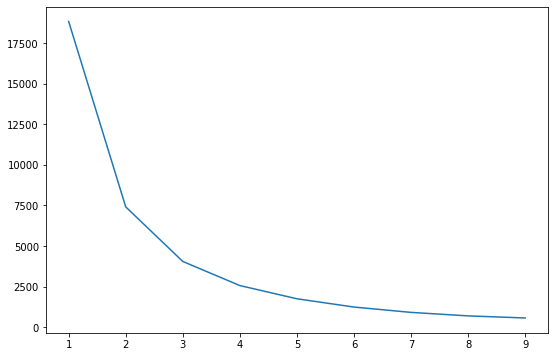

In [6]:
fig, axis = plt.subplots(1, 1, figsize=(9*1, 6*1))
axis.plot(ls[0], ls[1])
plt.show()

In [7]:
def encodeColor(color):
    cmap = {0 : 'r', 1: 'g', 2:'b'}
    ls = [cmap[y] for y in color]
    return ls

In [8]:
model = KMeans(n_clusters=3, max_iter=100)
model.fit(X)

KMeans(max_iter=100, n_clusters=3)

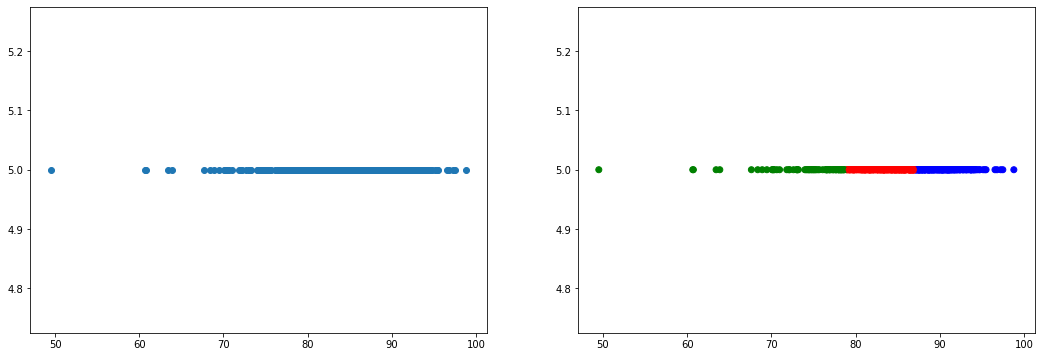

In [9]:
fig, axis = plt.subplots(1, 2, figsize=(9*2, 6*1))
axis[0].scatter(X, np.zeros(X.shape[0])+5)
axis[1].scatter(X, np.zeros(X.shape[0])+5,c = encodeColor(model.labels_))
plt.show()

In [10]:
labels = list(model.labels_)
print('Red', labels.count(0))
print('Green', labels.count(1))
print('Blue', labels.count(2))

Red 218
Green 68
Blue 207
